In [2]:
# Import relevant libraries. 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Import the dataset using pandas. 
## household_power_consumption.txt is publicly available at @  and the link is made available in the project readme - summary. 
## dataset source. 



df = pd.read_csv('household_power_consumption.txt', delimiter= ';', header =0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'], na_values = '?', dtype = float) 
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# dataset explaination and description. 

In [4]:
# Handling missing values.

# cleaning steps:
### 1- 
### 1- 
### 1- 
### 1- 
df.isna().sum()


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [6]:
df.replace('?', 'nan',inplace = True)
df.fillna(method = 'ffill', inplace=True)

In [ ]:
## for the sake of our analysis, we need to extract a new value which is derived from the quotient of two columns:

## sub_metering_4 = ((Global_active_power * fn(e)) - (Sub_metering_1 + (Sub_metering_2 + (Sub_metering_3 ))



In [8]:
# add a column for the remainder of sub metering - sub_metering_4

values = df.values.astype('float32')
df['Sub_metering_4'] = ((values[:,0])*1000/60) - (values[:,4] + values[:,5] + values[:,6])

df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800003
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.099998


In [9]:
## Vizualization. 

# Downsampling daily
df_daily = df.resample('D').mean()
df_daily.head(10)

#

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,37.073063
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,25.657408
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,13.214190
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,9.119375
2006-12-20,1.545658,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972,14.156112
2006-12-21,1.192439,0.100115,241.042285,5.028194,1.225694,1.821528,7.236806,9.589953
2006-12-22,1.625929,0.129796,241.184549,6.872917,2.188194,0.243056,7.729861,16.937710
2006-12-23,3.314851,0.153799,240.136076,14.028056,1.853472,0.295139,10.226389,42.872524
2006-12-24,1.770842,0.104097,241.687437,7.640417,1.182639,3.529167,4.785417,20.016806


In [22]:
df_hourly = df.resample('H').mean()
df_hourly.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,52.992596
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,36.953331
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,38.553890
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,37.692776
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,33.307777
2006-12-16 22:00:00,2.200133,0.056167,238.760000,9.523333,0.0,0.133333,4.433333,32.102222
2006-12-16 23:00:00,2.061600,0.071433,240.619667,8.896667,0.0,0.083333,0.000000,34.276669
2006-12-17 00:00:00,1.882467,0.102433,240.961833,8.126667,0.0,0.466667,0.000000,30.907778
2006-12-17 01:00:00,3.349400,0.136933,240.448333,14.246667,0.0,25.233333,0.000000,30.590000


In [13]:
df_weekly = df.resample('W').mean()
df_weekly.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-17,2.505248,0.142118,239.258088,10.664161,1.107298,2.577887,9.949346,28.119608
2006-12-24,1.733890,0.116684,241.369917,7.340714,1.110119,2.118155,7.683234,17.986666
2006-12-31,1.959222,0.144163,241.909324,8.241607,1.419940,2.248611,6.673909,22.311234
2007-01-07,1.484233,0.133825,240.921636,6.262123,0.581052,1.745933,5.376290,17.033943
2007-01-14,1.605115,0.157797,240.269635,6.831825,1.331349,1.883829,8.271032,15.265701
2007-01-21,1.639451,0.136597,240.440150,6.968413,2.324901,1.991567,8.086508,14.921206
2007-01-28,1.517532,0.106537,241.991175,6.397698,1.138393,1.482440,7.150694,15.520679
2007-02-04,1.703608,0.124478,240.280237,7.189345,1.146131,1.744048,9.448810,16.054485
2007-02-11,1.494935,0.115253,240.900698,6.312877,1.498710,1.735020,7.122817,14.559037


In [12]:
df_monthly = df.resample('M').mean()
df_monthly.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-31,1.901537,0.131400,241.440835,8.030969,1.251864,2.216312,7.409847,20.814259
2007-01-31,1.546085,0.132683,240.904831,6.547133,1.264180,1.775851,7.383759,15.344292
2007-02-28,1.401165,0.113634,240.519177,5.914911,1.180159,1.602282,6.704067,13.866243
2007-03-31,1.318606,0.114747,240.513524,5.572890,1.361313,2.346819,6.504503,11.764132
2007-04-30,0.856787,0.126467,239.127693,3.685574,0.974028,0.889282,4.386644,8.029823
2007-05-31,0.985862,0.115343,235.178364,4.297464,1.696617,1.615860,5.139964,7.978589
2007-06-30,0.826887,0.146355,238.877480,3.603718,1.381319,1.619074,4.372731,6.408321
2007-07-31,0.668133,0.128498,237.678656,2.949122,0.964427,1.248499,3.468302,5.454328
2007-08-31,0.763909,0.112822,237.936632,3.311537,0.812074,1.113642,5.050224,5.755880


In [14]:
df_yearly = df.resample('Y').mean()
df_yearly.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-31,1.901537,0.131400,241.440835,8.030969,1.251864,2.216312,7.409847,20.814259
2007-12-31,1.112505,0.118097,239.361821,4.746181,1.222510,1.625512,5.751560,9.942164
2008-12-31,1.072285,0.117129,240.626469,4.552742,1.109641,1.256142,6.036401,9.469236
2009-12-31,1.072504,0.131145,241.892622,4.529006,1.127675,1.132913,6.775538,8.838944
2010-12-31,1.049794,0.126970,241.526984,4.428832,0.964130,1.078331,7.131002,8.323112


In [15]:
df_bimonthly = df.resample('2M').mean()
df_bimonthly.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-31,1.901537,0.131400,241.440835,8.030969,1.251864,2.216312,7.409847,20.814259
2007-02-28,1.477309,0.123643,240.721809,6.247095,1.224306,1.693479,7.061194,14.642845
2007-04-30,1.091482,0.120511,239.831968,4.644702,1.170845,1.629998,5.462933,9.927588
2007-06-30,0.907677,0.130595,236.997601,3.956277,1.541553,1.617441,4.762637,7.206326
2007-08-31,0.716021,0.120660,237.807644,3.130329,0.888250,1.181071,4.259263,5.605103
2007-10-31,1.037796,0.109472,239.577403,4.430339,1.093568,1.857844,5.492816,8.852371
2007-12-31,1.463203,0.103844,241.304565,6.144041,1.422074,1.782753,7.537921,13.643972
2008-02-29,1.325368,0.087371,240.625176,5.598424,1.180463,1.383773,6.575949,12.949286
2008-04-30,1.181719,0.112629,241.274129,4.970371,1.254440,1.709347,6.550159,10.181370


In [11]:
# A closer look at the downsampling transformation that occured. 

# we can see that the dataset in b is evaluated at mean daily measures for each value. while the datetime is at once per day.

# depending on the analytical goals involved and dataset size, we can resample monthly, weekly or yearly.
a = df.head(60)
b = df_daily.head(10)

print(a, b)

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
2006-12-16 17:29:00                3.520                  0.522   235.02   
2006-12-16 17:30:00                3.702                  0.520   235.09   
2006-12-16 17:31:00                3.700                  0.520   235.22   
2006-12-16 17:32:00                3.668                  0.510   233.99   
2006-12-16 17:33:00                3.662                  0.510   233.86   
2006-12-16 17:34:00                4.448                  0.498   232.86   
2006-12-16 1

## VISUUALIZATION! 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Sub_metering_4         float32
dtypes: float32(1), float64(7)
memory usage: 134.6 MB


In [20]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.086168e+00,1.233280e-01,2.408416e+02,4.604226e+00,1.110995e+00,1.287958e+00,6.416570e+00,9.287283e+00
std,1.053172e+00,1.125144e-01,3.235574e+00,4.426775e+00,6.115908e+00,5.786865e+00,8.419505e+00,9.536341e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,5.980000e-01,1.000000e-01,2.410200e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.524000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.040000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


#### Global active power : Daily, weekly, monthly.


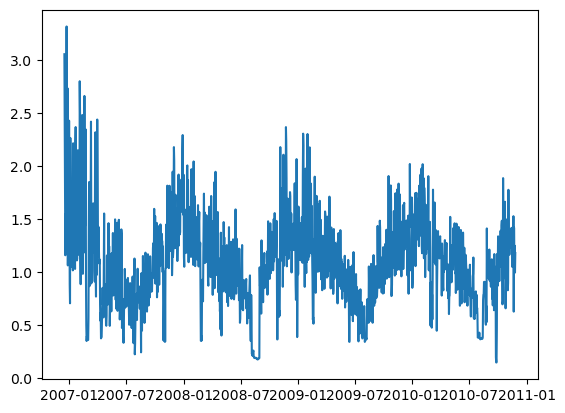

In [9]:
# Visualizing the distribition for daily global active power.
df_daily_global_active = df_daily['Global_active_power']
plt.plot(df_daily_global_active)

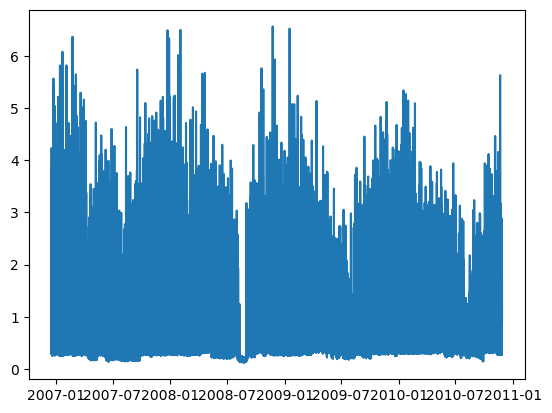

In [23]:
df_hourly_global_active = df_hourly['Global_active_power']
plt.plot(df_hourly_global_active)

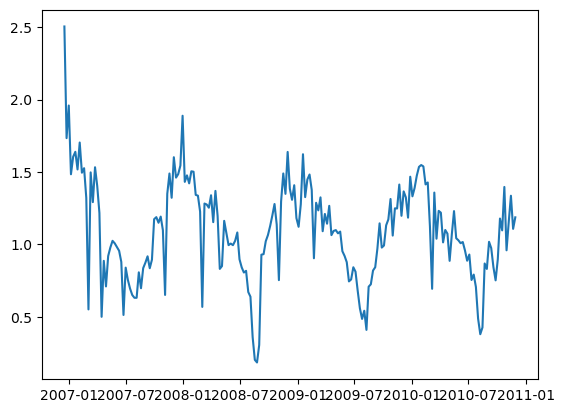

In [21]:
df_weekly_global_active = df_weekly['Global_active_power']
plt.plot(df_weekly_global_active)

In [25]:
### Here will request the corellation values for the relationships in the dataset. 

In [24]:
# Import those libraries 
import pandas as pd 
from scipy.stats import pearsonr 
  
# Import your data into Python 
 
  
# Convert dataframe into series 
list1 = df['Global_active_power'] 
list2 = df['Global_reactive_power'] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.25


In [11]:
# the pearson correlation coeficient between Voltage and Global_intensity

list3 = df['Voltage'] 
list4 = df['Global_intensity'] 
  
# Apply the pearsonr() 
corr,_ = pearsonr(list3, list4) 
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: -0.41


In [14]:
pip install fbprophet


     ---------------------------------------- 0.0/64.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/64.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/64.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/64.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/64.0 kB ? eta -:--:--
     ------------------------- -------------- 41.0/64.0 kB 2.0 MB/s eta 0:00:01
     ------------------------- -------------- 41.0/64.0 kB 2.0 MB/s eta 0:00:01
     ------------------------- -------------- 41.0/64.0 kB 2.0 MB/s eta 0:00:01
     ------------------------- -------------- 41.0/64.0 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 64.0/64.0 kB 246.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for Cython>=0.22 from https://files.pythonhosted.org/packages/30/ca/d68432adc1bf90b450c4d9aaf7cbadae5

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\DELL\AppData\Local\Temp\pip-install-r00rgw6c\pystan_88aaac4e7f84435b8bd6f75c4b78386a\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.



     ---- ----------------------------------- 0.6/5.8 MB 29.1 kB/s eta 0:02:56
     ---- ----------------------------------- 0.6/5.8 MB 29.1 kB/s eta 0:02:56
     ---- ----------------------------------- 0.7/5.8 MB 28.6 kB/s eta 0:02:59
     ---- ----------------------------------- 0.7/5.8 MB 28.6 kB/s eta 0:02:59
     ---- ----------------------------------- 0.7/5.8 MB 28.6 kB/s eta 0:02:59
     ---- ----------------------------------- 0.7/5.8 MB 28.6 kB/s eta 0:02:59
     ---- ----------------------------------- 0.7/5.8 MB 28.6 kB/s eta 0:02:59
     ---- ----------------------------------- 0.7/5.8 MB 28.6 kB/s eta 0:02:59
     ---- ----------------------------------- 0.7/5.8 MB 28.6 kB/s eta 0:02:59
     ---- ----------------------------------- 0.7/5.8 MB 28.6 kB/s eta 0:02:59
     ---- ----------------------------------- 0.7/5.8 MB 28.6 kB/s eta 0:02:59
     ---- ----------------------------------- 0.7/5.8 MB 28.6 kB/s eta 0:02:59
     ---- ----------------------------------- 0.7/5

In [15]:
## Making Predictions

from fbprophet import Prophet



ModuleNotFoundError: No module named 'fbprophet'

In [16]:
# due to the above error, I suggest that you complete the remainder of this project using google colab notebooks

In [26]:
# Train test split.
x = len(df_daily)
print('x:', x)
split = x- 365



x: 1442


In [27]:
train = df_daily[0:split]
train.tail()
#len(train)



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2009-11-22,1.702067,0.154610,241.077701,7.193194,4.704167,0.285417,11.178472,12.199722
2009-11-23,1.021613,0.103012,242.742715,4.236667,0.000000,0.279167,5.715278,11.032431
2009-11-24,1.478372,0.106819,241.976528,6.179861,1.729861,3.179861,6.309722,13.420093
2009-11-25,1.375090,0.121858,241.178785,5.770278,0.517361,3.529861,7.358333,11.512615
2009-11-26,1.110851,0.098293,242.643465,4.611250,1.570833,0.282639,6.992361,9.668357


In [28]:
test = df_daily[split:]
len(test)



365

In [29]:
df_daily1 = train.reset_index()
df_daily1 = df_daily1[['datetime','Global_active_power']]
df_daily1.head()


,datetime,Global_active_power
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [30]:

new_df = df_daily1.rename(columns={'datetime': 'ds', 'Global_active_power':'y'})
new_df.head()


,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [ ]:

# Prediction using prophet.
# Predict for the next 12 months.
future = model.make_future_dataframe(periods = 365, freq = 'D')
forecast = model.predict(future)
forecast.tail(20)

model.plot(forecast)
plt.show()

# Evaluate model performance.: 